# IRIS DATASET: ¿Qué es? 

<b>Es un set de datos muy típico en Machine Learning para principiantes</b>

### Nota: Instrucción utilizada en el CMD para transformarlo en pdf.
<code>jupyter nbconvert --to webpdf --allow-chromium-download Introduccion_MachineLearning_Iris_dataset.ipynb</code>

<code>jupyter nbconvert --to pdf --allow-chromium-download Introduccion_MachineLearning_Iris_dataset.ipynb</code>

<code>jupyter nbconvert --to pdf Introduccion_MachineLearning_Iris_dataset.ipynb</code>

https://towardsdatascience.com/how-to-convert-jupyter-notebooks-into-pdf-5accaef3758

https://www.ctan.org/pkg/ltxcmds



# 1. Obtención de Datos: 

Para hacerlo simple, lo haremos de una determinada manera, pero sabiendo que hay más formas de obtener datos:

<ul>
    <li>mediante scrapeo web</li>
    <li>conectándonos a las APIs</li>
</ul>

Este dataset se basa en un conjunto de datos que contiene 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virgínica e Iris versicolor).

Para el estudio se midieron cuatro rasgos de cada muestra: el largo y ancho, tanto para el sépalo como para el pétalo (todo ello en cm).

## 1.1. Una posible forma de extraer los datos

In [1]:
# Nos vamos a este link:
# https://archive.ics.uci.edu/ml/datasets/iris

# Download: Data Folder, Data Set Description
# Nos iríamos a: Data Folder
# y de ahí obtenemos los datos.

## 1.2. Otra posible forma de extraer los datos - Desde la plataforma sklearn

In [2]:
# 2ª forma de obtener el dataset:

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

# Previamente en el CMD, si no estaba instalado el paquete previamente:
# pip install sklearn

from sklearn import datasets

iris = datasets.load_iris()
#iris

In [3]:
#iris.data

In [4]:
iris.target
# 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
# El 0 se refiere al tipo 'setosa', el 1 al 'versicolor' y el 2 a 'virginica'.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 1.3. Nuestro caso - Proporcionar y utilizar el .csv diréctamente 

In [5]:
# La forma que usaremos será la obtención de datos desde el CSV.

# 2. Importamos algunas dependencias generales 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. Hacemos uso de pandas para importar la información .csv 

In [1]:
# PEGAMOS LA RUTA DONDE ESTÁ EL .csv CON LOS DATOS DE IRIS EN NUESTRO PC. Por ejemplo:
# C:\Users\RUBEN\Desktop\Machine Learning
# y usamos '/' en vez de '\'

# En mi caso:
# C:/Users/RUBEN/Desktop/Machine Learning/ (ruta)
# 2_IrisSpecies.csv (nombre del documento con extensión .csv)

# df (nombre que damos al DataFrame exportado)
# .head() nos permite imprimir las primeras 5 líneas

In [8]:
df = pd.read_csv('C:/Users/RUBEN/Desktop/Machine Learning/2_IrisSpecies.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Dibujamos algunas gráficas 

In [9]:
# https://seaborn.pydata.org/installing.html
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface 
# for drawing attractive and informative statistical graphics.

# Previamente en el CMD, si no estaba instalado el paquete previamente:
# pip install seaborn

import seaborn as sns

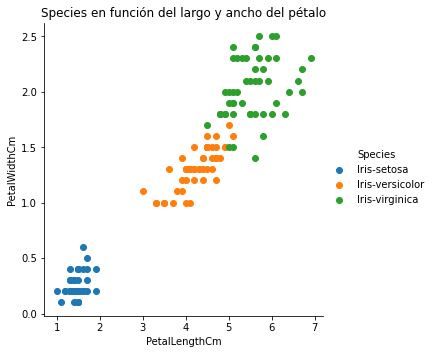

In [10]:
# Para el pétalo:

sns.FacetGrid(df, hue='Species', height=4.8) \
    .map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm') \
    .add_legend()

plt.title('Species en función del largo y ancho del pétalo')
plt.show()

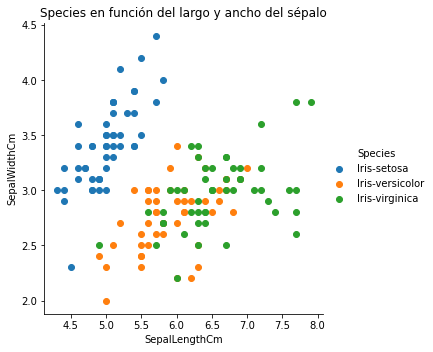

In [11]:
# Para el sépalo:

sns.FacetGrid(df, hue='Species', height = 4.8) \
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
    .add_legend() \
    .set(title = 'Species en función del largo y ancho del sépalo')

# plt.title('Species en función del largo y ancho del sépalo')
plt.show()

In [12]:
# Es decir, para la Iris-setosa vemos que tienen un tamaño característico de 4.3-5.8 cm de largo 
# y un ancho mayor a 2.9 cm.
# Las demás tienen tamaños muy dispersos.

# 5. Observamos la información de la que disponemos 

###### y hago algunas transformaciones, si lo necesito

#### 5.1. Eliminamos columnas sin información relevante

In [13]:
df = df.drop('Id', axis=1)

# La columna 'Id' no aporta ninguna información útil
# axis = 1 indica que borre por columnas.

# Imprimimos las 2 primeras filas para comprobar que se ha borrado la columna 'Id':
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### 5.2. Modificamos la información para poder utilizarla según nos convenga --> Texto en número 

In [14]:
# Para ver el nombre de las columnas en las que se clasifican los datos:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
# Para obtener información sobre una columna utilizamos
# .value_counts()
# nombreDataFrame.nombreColumna.value_counts()
# nos permite sabe cuántos tipos de salida distintos tenemos y su repetición en esa columna:

df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [16]:
# Modifico los 3 nombres de Species en los números 0-1-2 y se los asignamos a la columna.

# Para ello utilizamos .map() para transformar el texto en números (existen más formas de hacerlo):
df.Species = df.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
# Comprobamos que se ha producido el cambio:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Podemos crear una lista con los datos de la columna 'Species' para almacenarlos y trabajar con ellos.
# .tolist() permite transformar la información de una columna en una lista.

#df.Species.tolist()

In [18]:
# Para que quede más ordenado al imprimirlo por pantalla podemos utilizar:
# np.array()
np.array(df.Species.tolist())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Y para que lo muestre sin el nombre 'array([...])', lo printeamos:
print(np.array(df.Species.tolist()))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
# OTRA FORMA:
    # Podríamos utilizar un bucle, pero .map es más rápido.

#### NOTAS: 
Este dataset no requiere de escalado de datos para evitar que la calidad de las predicciones se vea afectada. <br>
Ver: https://interactivechaos.com/es/manual/tutorial-de-machine-learning/escalado-de-datos

# 6. Establezco las matrices X e y 

<ul>
    <li>X es la información a proporcionar --> Input = entrada</li>
    <li>y es la información a predecir ¿y es una matriz columna? --> Output = salida</li>
</ul>

Vamos a predecir el tipo de especie a partir de los datos que se nos den sobre sus pétalos y sépalos.

In [21]:
# X = los datos sobre los pétalos y sépalos:
X = df.drop('Species', axis = 1)
# Comprobamos que se ahya eliminado la columna 'Species'
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# y = la salida, la información a predecir, será solamente la columna Species.
y = df['Species']
# Comprobamos:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# 7. Divido mi set de datos en: train, test
#### (set de entrenamiento y set para testeo, respectivamente)

In [23]:
# Instalamos con el CMD el módulo sklearn.
# pip install sklearn

from sklearn.model_selection import train_test_split


In [24]:
# Separo los datos de la siguiente forma aleatoria(por ejemplo):
# 80% para train (entrenamiento): 80% de 150 = 120
# 20% para test (prueba)        : 20% de 150 = 30

# train_size = 0.80 indica el 80% para el entrenamiento.
# random_state = 0 sirve para obtener siempre el mismo resultado

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 0)

# Nota: POR DEFECTO ES 75% PARA TRAIN Y 25% PARA TEST SI NO SE ESPECIFICA NI test_size ni train_size

# NOTA:
# En aquellos casos que hubiera problema al entrenar con los algoritmos:
# 1 típica forma de solucionarlo es:
# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values

In [25]:
X_test.count()

SepalLengthCm    30
SepalWidthCm     30
PetalLengthCm    30
PetalWidthCm     30
dtype: int64

In [26]:
X_train.count()

SepalLengthCm    120
SepalWidthCm     120
PetalLengthCm    120
PetalWidthCm     120
dtype: int64

In [27]:
y_train.count()

120

In [28]:
y_test.count()

30

# 8. Machine Learning y Algoritmos --> 1ª predicción 
#### Lo 1º será decidir si estamos ante un problema de regresión, clasificación o clustering.
#### En este caso es un problema de Clasificación Multivariable (posibles salidas: 0, 1 y 2)
#### Por lo tanto, tenemos que elegir un Clasificador --> 
### DecisionTreeClassifier del módulo sklearn

In [29]:
from sklearn.tree import DecisionTreeClassifier

Pasos tras decidir nuestro clasificador:
<ol>
    <li>Entreno con: X_train, y_train</li>
    <li>Le proporciono entonoces los datos de X_test, con la idea de que sea capaz de predecir por sí solo y_test (en base al aprendizaje adquirido por X_train e y_train) y dado que para ciertos valores 'X' sale una 'y' concreta. Esta predicción lo guarda en <b>y_pred</b>. Recordemos que estamos tratando de predecir <b>y_test</b>, que ya SABEMOS lo que vale.</li>
    <li>Analizamos la fiabilidad del modelo (accuracy), que símplemente testea cuántos 'aciertos' tiene nuestra predicción.</li>
<ol>

In [30]:
# 1 - Nuestro clasificador (clf) será DecisionTreeClassifier
clf = DecisionTreeClassifier()
# 2 - Entreno con los datos de entrenamiento, que indico entre paréntesis.
clf.fit(X_train, y_train)
# 3 - Realizo la predicción --> trato de obtener los datos de y_test y lo almaceno en y_pred (y predecida)
y_pred = clf.predict(X_test)
# Imprimo esa predicción
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

# 9. Evalúo el modelo

### 9.1. Forma 1
Una posible forma para ello es utilizar <b>accuracy_score</b> del módulo sklearn.metrics. Existen muchas otras, pero con esta sería suficiente por ahora.

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Me dice que % de coincidencia hay entre y_test e y_pred
acc = accuracy_score(y_test,y_pred)
acc

1.0

### 9.2. Forma 2

In [33]:
# 1.0 indica que el 100% de los datos han sido predecidos corréctamente.

# ¿Cómo trabaja accaccuracy_score? Como un contador de la siguiente manera:
    # Transformamos y_test e y_pred en una lista de datos con .tolist()
y_test = y_test.tolist()
y_pred = y_pred.tolist()
    # Creamos un contador para averiguar cuántas fueron correctas, iniciándolo en 0:
aciertos = 0
    # lo que hacemos es crear un bucle for que va de 1 en 1 comprobando cuáles son iguales:
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        aciertos += 1

print(aciertos)

30


In [34]:
aciertos_proporcion = aciertos/len(y_test)
print(aciertos_proporcion)
porcentaje_aciertos = aciertos_proporcion*100
print(porcentaje_aciertos)

1.0
100.0


# 10. Machine Learning y Algoritmos --> 2ª división de datos, predicción y evaluación
#### Lo 1º será decidir si estamos ante un problema de regresión, clasificación o clustering.
#### En este caso es un problema de Clasificación Multivariable (posibles salidas: 0, 1 y 2)
#### Por lo tanto, tenemos que elegir un Clasificador --> 
### DecisionTreeClassifier del módulo sklearn

In [35]:
# Separo los datos de la siguiente forma aleatoria(por ejemplo):
# 20% para train (entrenamiento): 20% de 150 = 30
# 80% para test (prueba)        : 80% de 150 = 120

# train_size = 0.20 indica el 20% para el entrenamiento.
# random_state = 0 sirve para obtener siempre el mismo resultado

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.20, random_state = 0)

# Nota: POR DEFECTO ES 75% PARA TRAIN Y 25% PARA TEST SI NO SE ESPECIFICA NI test_size ni train_size

In [36]:
print(X_test.count())

print(X_train.count())

print(y_train.count())

print(y_test.count())

SepalLengthCm    120
SepalWidthCm     120
PetalLengthCm    120
PetalWidthCm     120
dtype: int64
SepalLengthCm    30
SepalWidthCm     30
PetalLengthCm    30
PetalWidthCm     30
dtype: int64
30
120


In [37]:
# 1 - Nuestro clasificador (clf) será DecisionTreeClassifier
clf = DecisionTreeClassifier()
# 2 - Entreno con los datos de entrenamiento, que indico entre paréntesis.
clf.fit(X_train, y_train)
# 3 - Realizo la predicción --> trato de obtener los datos de y_test y lo almaceno en y_pred (y predecida)
y_pred = clf.predict(X_test)
# Imprimo esa predicción
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 1], dtype=int64)

In [38]:
# Me dice que % de coincidencia hay entre y_test e y_pred
acc = accuracy_score(y_test,y_pred)
acc

0.9166666666666666

In [39]:
# 0.9166666666666666 indica que el 91.66% de los datos han sido predecidos corréctamente.

# ¿Cómo trabaja accaccuracy_score? Como un contador de la siguiente manera:
    # Transformamos y_test e y_pred en una lista de datos con .tolist()
y_test = y_test.tolist()
y_pred = y_pred.tolist()
    # Creamos un contador para averiguar cuántas fueron correctas, iniciándolo en 0:
aciertos = 0
    # lo que hacemos es crear un bucle for que va de 1 en 1 comprobando cuáles son iguales:
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        aciertos += 1

print(aciertos)

aciertos_proporcion = aciertos/len(y_test)
print(aciertos_proporcion)
porcentaje_aciertos = aciertos_proporcion*100
print(porcentaje_aciertos)

110
0.9166666666666666
91.66666666666666


# 11. Eligiendo otro clasificador
### RandomForestClassifier del módulo sklearn.ensemble
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Separo los datos de la siguiente forma aleatoria(por ejemplo):
# 20% para train (entrenamiento): 20% de 150 = 30
# 80% para test (prueba)        : 80% de 150 = 120

# train_size = 0.20 indica el 20% para el entrenamiento.
# random_state = 0 sirve para obtener siempre el mismo resultado

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.20, random_state = 0)

# Nota: POR DEFECTO ES 75% PARA TRAIN Y 25% PARA TEST SI NO SE ESPECIFICA NI test_size ni train_size

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 1], dtype=int64)

In [41]:
acc = accuracy_score(y_test, y_pred)
acc

0.9166666666666666

####  Nota: Obtenemos los mismos resultados con ambos Clasificadores

## CONCLUSIÓN: Cuánto mayor sea X_train e Y_train, más precisión tendremos en la predicción.

### Nota sobre los casos prácticos:
Lo que se suele tener es un set de datos llamado "train.csv" sobre el que seguimos los pasos descritos, y otro llamado "test.csv" sin información de 'salida', la cual debemos predecir.